In [3]:
import ema as em
import matplotlib.pyplot as plt
import numpy as np
# %config InlineBackend.figure_format = 'svg' # used to make plots look nicer

In [4]:
# Initialize model
mdl = em.rModel(2,3)
nodes = mdl.nodes # returns an automatically updating LIST of node objects in model
n = mdl.dnodes    # returns an automatically updating DICT of node objects in model

# Define default section properties
A=1
I  = 60000
xsec = mdl.xsection('default', A, I)


# Define nodes
mdl.node('1', 0.0, 0.0)
mdl.node('2', 8., 0.0)
mdl.node('3', 12., 0.0)
mdl.node('4', 20., 0.0)

# Create beams
a, b, c = mdl.girder(nodes)

mdl.hinge(a, n['1'])
mdl.hinge(a, n['2'])
mdl.hinge(c, n['4'])

# Establish fixities
mdl.fix(n['1'], ['x','y', 'rz'])
mdl.fix(n['3'], ['y'])
mdl.fix(n['4'], ['y', 'rz'])

# uncomment line below to automatically print FEDEASLab input script
# em.utilities.export.FEDEAS(dm)

mdl.DOF = [[4, 5, 6], [4, 1, 3], [4, 7, 2], [4, 8, 9]] # automatically number dofs and print them as list
mdl.NOS # return degree of static indeterminacy

3

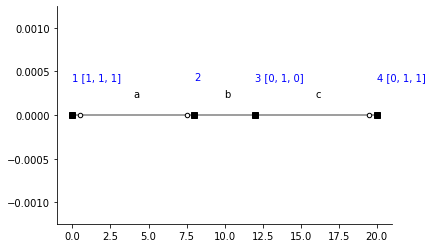

In [5]:
fix, ax = plt.subplots()
em.plot_beam(mdl, ax)

In [14]:
A = em.A_matrix(mdl)
A.f

,$1$,$2$,$3$
$a_1$,0.000,0.0,0.0
$a_2$,-0.125,0.0,0.0
$a_3$,-0.125,0.0,1.0
$b_1$,-0.000,0.0,0.0
$b_2$,0.250,0.0,1.0
$b_3$,0.250,1.0,0.0
$c_1$,0.000,0.0,0.0
$c_2$,0.000,1.0,0.0
$c_3$,0.000,0.0,0.0


In [13]:
A.f.c.del_zeros()

,$1$,$2$,$3$
$b_2$,0.25,0.0,1.0
$b_3$,0.25,1.0,0.0
$c_2$,0.00,1.0,0.0


In [12]:
A.f.c.del_zeros().inv

,$b_2$,$b_3$,$c_2$
$1$,0.0,4.0,-4.0
$2$,0.0,0.0,1.0
$3$,1.0,-1.0,1.0
